In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
dframe = pd.read_csv('lec25.csv')

In [9]:
dframe

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date
0,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020"
1,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019"
2,Resolute Bank,Maumee,OH,58317,Buckeye State Bank,"October 25, 2019"
3,Louisa Community Bank,Louisa,KY,58112,Kentucky Farmers Bank Corporation,"October 25, 2019"
4,The Enloe State Bank,Cooper,TX,10716,"Legend Bank, N. A.","May 31, 2019"
5,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,"December 15, 2017"
6,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,"October 13, 2017"
7,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb","May 26, 2017"
8,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,"May 5, 2017"
9,First NBC Bank,New Orleans,LA,58302,Whitney Bank,"April 28, 2017"


In [4]:
dframe= pd.read_csv('lec25.csv', header = None)

In [ ]:
dframe

In [ ]:
dframe = pd.read_table('lec25.csv', sep = ',', header = None)
dframe

In [ ]:
pd.read_csv('lec25.csv', header = None, nrows = 2)

In [ ]:
dframe.to_csv('mytextdata_out.csv')

In [ ]:
import sys


In [ ]:
dframe.to_csv(sys.stdout)

In [ ]:
dframe.to_csv(sys.stdout, sep = '_')

In [ ]:
dframe.to_csv(sys.stdout, sep ='?')

In [ ]:
dframe.to_csv(sys.stdout, columns = [0,1,2])

In [ ]:
# working with Json

json_obj = """
{   "zoo_animal": "Lion",
    "food": ["Meat", "Veggies", "Honey"],
    "fur": "Golden",
    "clothes": null, 
    "diet": [{"zoo_animal": "Gazelle", "food":"grass", "fur": "Brown"}]
}
"""

In [ ]:
import json

In [ ]:
data =json.loads(json_obj)

In [ ]:
data

In [ ]:
json.dumps(data)

In [ ]:
dframe = DataFrame(data['diet'])

In [ ]:
dframe

In [5]:
from pandas import read_html


In [6]:
url = 'http://www.fdic.gov/bank/individual/failed/banklist.html'

In [7]:
dframe_list = pd.io.html.read_html(url)

In [14]:
dframe = dframe_list[0]

In [15]:
dframe.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date
0,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020"
1,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019"
2,Resolute Bank,Maumee,OH,58317,Buckeye State Bank,"October 25, 2019"
3,Louisa Community Bank,Louisa,KY,58112,Kentucky Farmers Bank Corporation,"October 25, 2019"
4,The Enloe State Bank,Cooper,TX,10716,"Legend Bank, N. A.","May 31, 2019"


In [12]:
dframe.columns

Index(['Bank Name', 'City', 'ST', 'CERT', 'Acquiring Institution',
       'Closing Date'],
      dtype='object')

In [17]:
# working with excel files

xlsfile = pd.ExcelFile('lec_28_test.xlsx')

In [18]:
dframe = xlsfile.parse('Sheet1')

In [19]:
dframe

,this is a test,Unnamed: 1,Unnamed: 2
0,23,6678,456
1,234,678,456
2,234,7,345
3,34,56,234
4,5,456,4365


In [20]:
# working with merge

dframe1 = DataFrame({'key':['X','Z','Y','Z','Z','X','X'], 'data_set1': np.arange(7)})
dframe1


,data_set1,key
0,0,X
1,1,Z
2,2,Y
3,3,Z
4,4,Z
5,5,X
6,6,X


In [21]:
dframe2 = DataFrame({'key':['Q','Z','Y'], 'data_set2': [1,2,3]})
dframe2

,data_set2,key
0,1,Q
1,2,Z
2,3,Y


In [22]:
pd.merge(dframe1, dframe2)

,data_set1,key,data_set2
0,1,Z,2
1,3,Z,2
2,4,Z,2
3,2,Y,3


In [23]:
pd.merge(dframe1, dframe2, on = 'key')

,data_set1,key,data_set2
0,1,Z,2
1,3,Z,2
2,4,Z,2
3,2,Y,3


In [24]:
pd.merge(dframe1, dframe2, on = 'key', how = 'left')

,data_set1,key,data_set2
0,0,X,NaN
1,1,Z,2.0
2,2,Y,3.0
3,3,Z,2.0
4,4,Z,2.0
5,5,X,NaN
6,6,X,NaN


In [25]:
pd.merge(dframe1, dframe2, on = 'key', how = 'right')

,data_set1,key,data_set2
0,1.0,Z,2
1,3.0,Z,2
2,4.0,Z,2
3,2.0,Y,3
4,NaN,Q,1


In [26]:
pd.merge(dframe1, dframe2, on = 'key', how = 'inner')

,data_set1,key,data_set2
0,1,Z,2
1,3,Z,2
2,4,Z,2
3,2,Y,3


In [27]:
pd.merge(dframe1, dframe2, on = 'key', how = 'outer')

,data_set1,key,data_set2
0,0.0,X,NaN
1,5.0,X,NaN
2,6.0,X,NaN
3,1.0,Z,2.0
4,3.0,Z,2.0
5,4.0,Z,2.0
6,2.0,Y,3.0
7,NaN,Q,1.0


In [28]:
dframe3 = DataFrame({'key':['X','X','X','Y','Z','Z'], 'data_set_3': range(6)})
dframe4 = DataFrame({'key':['Y','Y','X','X','Z'], 'data_set_4': range(5)})

In [29]:
dframe3

,data_set_3,key
0,0,X
1,1,X
2,2,X
3,3,Y
4,4,Z
5,5,Z


In [30]:
dframe4

,data_set_4,key
0,0,Y
1,1,Y
2,2,X
3,3,X
4,4,Z


In [31]:
pd.merge(dframe3, dframe4)

,data_set_3,key,data_set_4
0,0,X,2
1,0,X,3
2,1,X,2
3,1,X,3
4,2,X,2
5,2,X,3
6,3,Y,0
7,3,Y,1
8,4,Z,4
9,5,Z,4


In [38]:
df_left = DataFrame({'key1':['SF','SF','LA'], 'key2': ['one','two','one'], 'left_data': [10,20,30]})

In [39]:
df_right = DataFrame({'key1':['SF','SF','LA', 'LA'], 'key2': ['one','one','one','two' ], 'right_data': [40,50,60,70]})

In [40]:
df_left

,key1,key2,left_data
0,SF,one,10
1,SF,two,20
2,LA,one,30


In [41]:
df_right

,key1,key2,right_data
0,SF,one,40
1,SF,one,50
2,LA,one,60
3,LA,two,70


In [42]:
pd.merge(df_left, df_right, on= ['key1', 'key2'], how = 'outer')

,key1,key2,left_data,right_data
0,SF,one,10.0,40.0
1,SF,one,10.0,50.0
2,SF,two,20.0,NaN
3,LA,one,30.0,60.0
4,LA,two,NaN,70.0


In [43]:
pd.merge(df_left, df_right, on = 'key1')

,key1,key2_x,left_data,key2_y,right_data
0,SF,one,10,one,40
1,SF,one,10,one,50
2,SF,two,20,one,40
3,SF,two,20,one,50
4,LA,one,30,one,60
5,LA,one,30,two,70


In [44]:
pd.merge(df_left, df_right, on = 'key1', suffixes = ('_lefty', '_righty'))

,key1,key2_lefty,left_data,key2_righty,right_data
0,SF,one,10,one,40
1,SF,one,10,one,50
2,SF,two,20,one,40
3,SF,two,20,one,50
4,LA,one,30,one,60
5,LA,one,30,two,70


In [45]:
# Merging using indexes
import pandas as pd
import numpy as np
from pandas import Series, DataFrame


In [48]:
df_left = DataFrame({'key':['X','Y','Z','X','Y'], 'data': range(5)})

In [49]:
df_right = DataFrame({'group_data': [10,20]}, index =['X', 'Y'])

In [50]:
df_left

,data,key
0,0,X
1,1,Y
2,2,Z
3,3,X
4,4,Y


In [51]:
df_right

,group_data
X,10
Y,20


In [56]:
pd.merge(df_left, df_right, left_on = 'key', right_index = True)

,data,key,group_data
0,0,X,10
3,3,X,10
1,1,Y,20
4,4,Y,20


In [57]:
df_left_hr = DataFrame({'key1': ['SF', 'SF', 'SF', 'LA', 'LA'], 'key2': [10,20,30,20,30], 'data':np.arange(5)})

In [58]:
df_left_hr

,data,key1,key2
0,0,SF,10
1,1,SF,20
2,2,SF,30
3,3,LA,20
4,4,LA,30


In [59]:
df_right_hr = DataFrame(np.arange(10).reshape(5,2), index = [['LA','LA','SF','SF',"SF"], [20,10,10,10,20]], 
                      columns = ['col1', 'col2'])

In [60]:
df_right_hr

col1  col2
LA 20     0     1
   10     2     3
SF 10     4     5
   10     6     7
   20     8     9

In [62]:
pd.merge(df_left_hr, df_right_hr, left_on =['key1', 'key2'], right_index = True)

,data,key1,key2,col1,col2
0,0,SF,10,4,5
0,0,SF,10,6,7
1,1,SF,20,8,9
3,3,LA,20,0,1


In [63]:
df_left.join(df_right)

,data,key,group_data
0,0,X,NaN
1,1,Y,NaN
2,2,Z,NaN
3,3,X,NaN
4,4,Y,NaN


In [64]:
arr1 = np.arange(9).reshape(3,3)
arr1

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [65]:
np.concatenate([arr1, arr1], axis = 1)

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [6, 7, 8, 6, 7, 8]])

In [66]:
np.concatenate([arr1, arr1], axis = 0)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8],
       [0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [67]:
ser1 = Series([0,1,2], index = ['T','U','V'])

ser2 = Series([3,4], index = ['X','Y'])

In [68]:
ser1


T    0
U    1
V    2
dtype: int64

In [69]:
ser2

X    3
Y    4
dtype: int64

In [70]:
pd.concat([ser1, ser2])

T    0
U    1
V    2
X    3
Y    4
dtype: int64

In [71]:
pd.concat([ser1, ser2], axis = 1)

,0,1
T,0.0,NaN
U,1.0,NaN
V,2.0,NaN
X,NaN,3.0
Y,NaN,4.0


In [72]:
pd.concat([ser1, ser2], keys = ['cat1', 'cat2'])

cat1  T    0
      U    1
      V    2
cat2  X    3
      Y    4
dtype: int64

In [73]:
dframe1 = DataFrame(np.random.randn(4,3), columns = ['X','Y', 'Z'])
dframe2 = DataFrame(np.random.randn(3,3), columns = ['Y','Q', 'X'])

In [74]:
dframe1

,X,Y,Z
0,-0.529157,-0.785677,-0.178420
1,0.615983,-0.570735,0.593015
2,-0.180459,0.067226,1.866407
3,0.020717,0.718345,-1.468388


In [75]:
dframe2

,Y,Q,X
0,0.787179,0.480484,0.067049
1,-1.396832,1.247059,1.186372
2,-0.040415,-1.017819,1.641581


In [76]:
pd.concat([dframe1, dframe2])

,Q,X,Y,Z
0,NaN,-0.529157,-0.785677,-0.178420
1,NaN,0.615983,-0.570735,0.593015
2,NaN,-0.180459,0.067226,1.866407
3,NaN,0.020717,0.718345,-1.468388
0,0.480484,0.067049,0.787179,NaN
1,1.247059,1.186372,-1.396832,NaN
2,-1.017819,1.641581,-0.040415,NaN


In [77]:
pd.concat([dframe1, dframe2], ignore_index = True)

,Q,X,Y,Z
0,NaN,-0.529157,-0.785677,-0.178420
1,NaN,0.615983,-0.570735,0.593015
2,NaN,-0.180459,0.067226,1.866407
3,NaN,0.020717,0.718345,-1.468388
4,0.480484,0.067049,0.787179,NaN
5,1.247059,1.186372,-1.396832,NaN
6,-1.017819,1.641581,-0.040415,NaN


In [80]:
# Combining Data Frames with overlapping indexes

ser1 = Series([2, np.nan,4, np.nan, 6, np.nan], index = ['Q','R','S','T','U','V'])

In [81]:
ser2 = Series(np.arange(len(ser1)), dtype = np.float64,index = ['Q','R','S','T','U','V'] )

In [82]:
ser1

Q    2.0
R    NaN
S    4.0
T    NaN
U    6.0
V    NaN
dtype: float64

In [83]:
ser2

Q    0.0
R    1.0
S    2.0
T    3.0
U    4.0
V    5.0
dtype: float64

In [84]:
Series(np.where(pd.isnull(ser1), ser2, ser1), index = ser1.index)

Q    2.0
R    1.0
S    4.0
T    3.0
U    6.0
V    5.0
dtype: float64

In [85]:
ser1.combine_first(ser2)

Q    2.0
R    1.0
S    4.0
T    3.0
U    6.0
V    5.0
dtype: float64

In [86]:
nan = np.nan
dframe_odds = DataFrame({'X': [1.,nan,3.,nan], 'Y': [nan,5.,nan,7.], 'Z': [nan,9,nan,11]})

In [92]:
dframe_evens =  DataFrame({'X': [2.,4.,nan,6.,8.], 'Y': [22.,10.,12., 14., 16.]})

In [93]:
dframe_odds

,X,Y,Z
0,1.0,NaN,NaN
1,NaN,5.0,9.0
2,3.0,NaN,NaN
3,NaN,7.0,11.0


In [94]:
dframe_evens

,X,Y
0,2.0,22.0
1,4.0,10.0
2,NaN,12.0
3,6.0,14.0
4,8.0,16.0


In [95]:
dframe_odds.combine_first(dframe_evens)

,X,Y,Z
0,1.0,22.0,NaN
1,4.0,5.0,9.0
2,3.0,12.0,NaN
3,6.0,7.0,11.0
4,8.0,16.0,NaN


In [97]:
# Reshapping

dframe1 = DataFrame(np.arange(8).reshape(2,4), index = pd.Index(['LA', 'SF'], name = 'City'),
                    columns = pd.Index(['A','B','C','D'], name = 'letter'))

dframe1

letter,A,B,C,D
City,,,,
LA,0,1,2,3
SF,4,5,6,7


In [98]:
dframe_st = dframe1.stack()

dframe_st

City  letter
LA    A         0
      B         1
      C         2
      D         3
SF    A         4
      B         5
      C         6
      D         7
dtype: int32

In [100]:
dframe_st.unstack('letter')

letter,A,B,C,D
City,,,,
LA,0,1,2,3
SF,4,5,6,7


In [102]:
dframe_st.unstack('City')

City,LA,SF
letter,,
A,0,4
B,1,5
C,2,6
D,3,7


In [103]:
ser1 = Series([0,1,2], index = ['Q','X', 'Y'])
ser2 = Series([4,5,6], index = ['X','Y', 'Z'])

In [104]:
dframe = pd.concat([ser1, ser2], keys = ['Alpha', 'Beta'])

In [105]:
dframe

Alpha  Q    0
       X    1
       Y    2
Beta   X    4
       Y    5
       Z    6
dtype: int64

In [106]:
dframe.unstack()

,Q,X,Y,Z
Alpha,0.0,1.0,2.0,NaN
Beta,NaN,4.0,5.0,6.0


In [107]:
dframe.unstack().stack()

Alpha  Q    0.0
       X    1.0
       Y    2.0
Beta   X    4.0
       Y    5.0
       Z    6.0
dtype: float64

In [108]:
# Pivoting

import pandas.util.testing as tm; tm.N = 3

#Create a unpivoted function
def unpivot(frame):
    N, K = frame.shape
    
    data = {'value' : frame.values.ravel('F'),
            'variable' : np.asarray(frame.columns).repeat(N),
            'date' : np.tile(np.asarray(frame.index), K)}
    
    # Return the DataFrame
    return DataFrame(data, columns=['date', 'variable', 'value'])

#Set the DataFrame we'll be using
dframe = unpivot(tm.makeTimeDataFrame())

In [109]:
dframe

,date,variable,value
0,2000-01-03,A,2.421799
1,2000-01-04,A,-0.694272
2,2000-01-05,A,0.894728
3,2000-01-03,B,-0.658469
4,2000-01-04,B,0.002350
5,2000-01-05,B,1.038947
6,2000-01-03,C,-0.495920
7,2000-01-04,C,0.171217
8,2000-01-05,C,-0.164010
9,2000-01-03,D,0.312029


In [111]:
dframe_piv = dframe.pivot('date', 'variable', 'value')
dframe_piv

variable,A,B,C,D
date,,,,
2000-01-03,2.421799,-0.658469,-0.495920,0.312029
2000-01-04,-0.694272,0.002350,0.171217,1.006559
2000-01-05,0.894728,1.038947,-0.164010,-0.172939


In [112]:
# Duplicates in data frames

dframe = DataFrame({'key1': ['A']*2 + ['B']*3, 'key2': [2,2,2,3,3]})

In [113]:
dframe

,key1,key2
0,A,2
1,A,2
2,B,2
3,B,3
4,B,3


In [114]:
dframe.duplicated()

0    False
1     True
2    False
3    False
4     True
dtype: bool

In [115]:
dframe.drop_duplicates()

,key1,key2
0,A,2
2,B,2
3,B,3


In [116]:
dframe.drop_duplicates(['key1'])

,key1,key2
0,A,2
2,B,2


In [117]:
dframe

,key1,key2
0,A,2
1,A,2
2,B,2
3,B,3
4,B,3


In [119]:
dframe.drop_duplicates(['key1'], take_last = True)

TypeError: drop_duplicates() got an unexpected keyword argument 'take_last'

In [131]:
dframe = DataFrame({'city': ['Alma', 'Brian Head', 'Fox Park'], 'altitude': [3158, 3000,2762]})
dframe

,altitude,city
0,3158,Alma
1,3000,Brian Head
2,2762,Fox Park


In [132]:
state_map = {'Alma':'Colorado', 'Brian Head':'Utah', 'Fox Park':'Wyoming'}

In [133]:
dframe['state'] = dframe['city'].map(state_map)

In [134]:
dframe

,altitude,city,state
0,3158,Alma,Colorado
1,3000,Brian Head,Utah
2,2762,Fox Park,Wyoming


In [135]:
# Replace

ser1 = Series([1,2,3,4,1,2,3,4])
ser1

0    1
1    2
2    3
3    4
4    1
5    2
6    3
7    4
dtype: int64

In [137]:
ser1.replace(1,np.nan)


0    NaN
1    2.0
2    3.0
3    4.0
4    NaN
5    2.0
6    3.0
7    4.0
dtype: float64

In [138]:
ser1.replace([1,4], [100,400])

0    100
1      2
2      3
3    400
4    100
5      2
6      3
7    400
dtype: int64

In [139]:
dframe = DataFrame(np.arange(12).reshape(3,4), index = ['NY','LA','SF'], columns = ['A','B','C','D'])
dframe

,A,B,C,D
NY,0,1,2,3
LA,4,5,6,7
SF,8,9,10,11


In [140]:
dframe.index.map(str.lower)

Index(['ny', 'la', 'sf'], dtype='object')

In [141]:
dframe.index = dframe.index.map(str.lower)

In [142]:
dframe

,A,B,C,D
ny,0,1,2,3
la,4,5,6,7
sf,8,9,10,11


In [143]:
dframe.rename(index = str.title, columns=str.lower)

,a,b,c,d
Ny,0,1,2,3
La,4,5,6,7
Sf,8,9,10,11


In [144]:
dframe.rename(index= {'ny': 'New York'}, columns ={'A':'Alpha'})

,Alpha,B,C,D
New York,0,1,2,3
la,4,5,6,7
sf,8,9,10,11


In [145]:
# binning

years = [1990,1991,1992,2008,2012,2015,1987,1969,2013,2008,1999]

In [146]:
decade_bins = [1960,1970,1980,1990,2000,2010,2020]

In [147]:
decade_cat = pd.cut(years, decade_bins)


In [148]:
decade_cat

[(1980, 1990], (1990, 2000], (1990, 2000], (2000, 2010], (2010, 2020], ..., (1980, 1990], (1960, 1970], (2010, 2020], (2000, 2010], (1990, 2000]]
Length: 11
Categories (6, interval[int64]): [(1960, 1970] < (1970, 1980] < (1980, 1990] < (1990, 2000] < (2000, 2010] < (2010, 2020]]

In [149]:
pd.value_counts(decade_cat)

(2010, 2020]    3
(1990, 2000]    3
(2000, 2010]    2
(1980, 1990]    2
(1960, 1970]    1
(1970, 1980]    0
dtype: int64

In [150]:
np.random.seed(12345)

In [151]:
dframe = DataFrame(np.random.randn(1000,4))

In [153]:
dframe.head()

,0,1,2,3
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,0.274992,0.228913,1.352917,0.886429
4,-2.001637,-0.371843,1.669025,-0.438570


In [154]:
dframe.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [155]:
col = dframe[0]
col.head()

0   -0.204708
1    1.965781
2    0.769023
3    0.274992
4   -2.001637
Name: 0, dtype: float64

In [156]:
col[np.abs(col) > 3]

523   -3.428254
900    3.366626
Name: 0, dtype: float64

In [158]:
dframe[(np.abs(dframe)> 3).any(1)]

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


In [160]:
# group by on Data Frames

dframe = DataFrame({'k1':['X', 'X', 'Y','Y', 'Z'], 'k2': ['alpha', 'beta', 'alpha',  'beta', 'alpha'],
                   'dataset1':np.random.randn(5), 'dataset2': np.random.randn(5)})

dframe

,dataset1,dataset2,k1,k2
0,1.150765,1.199915,X,alpha
1,-0.997174,-0.451814,X,beta
2,0.046486,-0.155385,Y,alpha
3,-0.610441,-0.153514,Y,beta
4,-0.394982,0.011194,Z,alpha


In [161]:
group1 = dframe['dataset1'].groupby(dframe['k1'])
group1

In [162]:
group1.mean()

k1
X    0.076796
Y   -0.281977
Z   -0.394982
Name: dataset1, dtype: float64

In [164]:
cities = np.array(['NY', 'LA', 'LA', 'NY', 'NY'])
months = np.array (['Jan', 'Feb','Jan', 'Feb', 'Jan'])

In [166]:
dframe['dataset1'].groupby([cities, months]).mean()

LA  Feb   -0.997174
    Jan    0.046486
NY  Feb   -0.610441
    Jan    0.377892
Name: dataset1, dtype: float64

In [167]:
dframe.groupby('k1').mean()

,dataset1,dataset2
k1,,
X,0.076796,0.374050
Y,-0.281977,-0.154450
Z,-0.394982,0.011194


In [168]:
dframe.groupby(['k1','k2']).mean()

dataset1  dataset2
k1 k2                       
X  alpha  1.150765  1.199915
   beta  -0.997174 -0.451814
Y  alpha  0.046486 -0.155385
   beta  -0.610441 -0.153514
Z  alpha -0.394982  0.011194

In [169]:
dframe.groupby(['k1']).size()

k1
X    2
Y    2
Z    1
dtype: int64

In [171]:
for name, group in dframe.groupby('k1'):
    print('this is the %s group' %name)
    print (group)
    print ('\n')

this is the X group
   dataset1  dataset2 k1     k2
0  1.150765  1.199915  X  alpha
1 -0.997174 -0.451814  X   beta


this is the Y group
   dataset1  dataset2 k1     k2
2  0.046486 -0.155385  Y  alpha
3 -0.610441 -0.153514  Y   beta


this is the Z group
   dataset1  dataset2 k1     k2
4 -0.394982  0.011194  Z  alpha




In [173]:
for (k1,k2), group in dframe.groupby(['k1', 'k2']):
    print('Key1 = %s Key2 = %s' %(k1,k2))
    print (group)
    print('\n')

Key1 = X Key2 = alpha
   dataset1  dataset2 k1     k2
0  1.150765  1.199915  X  alpha


Key1 = X Key2 = beta
   dataset1  dataset2 k1    k2
1 -0.997174 -0.451814  X  beta


Key1 = Y Key2 = alpha
   dataset1  dataset2 k1     k2
2  0.046486 -0.155385  Y  alpha


Key1 = Y Key2 = beta
   dataset1  dataset2 k1    k2
3 -0.610441 -0.153514  Y  beta


Key1 = Z Key2 = alpha
   dataset1  dataset2 k1     k2
4 -0.394982  0.011194  Z  alpha




In [174]:
group_dict = dict(list(dframe.groupby('k1')))

In [175]:
group_dict['X']

,dataset1,dataset2,k1,k2
0,1.150765,1.199915,X,alpha
1,-0.997174,-0.451814,X,beta


In [176]:
group_dict_axis1 = dict(list(dframe.groupby(dframe.dtypes, axis = 1)))


In [177]:
group_dict_axis1

{dtype('float64'):    dataset1  dataset2
 0  1.150765  1.199915
 1 -0.997174 -0.451814
 2  0.046486 -0.155385
 3 -0.610441 -0.153514
 4 -0.394982  0.011194, dtype('O'):   k1     k2
 0  X  alpha
 1  X   beta
 2  Y  alpha
 3  Y   beta
 4  Z  alpha}

In [178]:
dataset2_group = dframe.groupby(['k1','k2'])[['dataset2']]

dataset2_group.mean()

dataset2
k1 k2             
X  alpha  1.199915
   beta  -0.451814
Y  alpha -0.155385
   beta  -0.153514
Z  alpha  0.011194

In [179]:
dataset2_group = dframe.groupby(['k1'])[['dataset2']]

dataset2_group.mean()

,dataset2
k1,
X,0.374050
Y,-0.154450
Z,0.011194


In [183]:
# group by Series and Dict

animals = DataFrame(np.arange(16).reshape(4,4), columns = ['W','X','Y','Z'], index = ['Dog', 'Cat', 'Bird', 'Mouse'])

In [184]:
animals

,W,X,Y,Z
Dog,0,1,2,3
Cat,4,5,6,7
Bird,8,9,10,11
Mouse,12,13,14,15


In [213]:
animals.ix [1:2,['W','Y']] = np.nan

In [214]:
animals

,W,X,Y,Z
Dog,0.0,1.0,2.0,3.0
Cat,NaN,5.0,NaN,7.0
Bird,8.0,9.0,10.0,11.0
Mouse,12.0,13.0,14.0,15.0
W,NaN,NaN,NaN,NaN


In [206]:
behaviour_map = {'W': 'good', 'X': 'bad', 'Y':  'good', 'Z': 'bad'}

In [209]:
animal_col = animals.groupby(behaviour_map, axis = 1)

animal_col.sum()

,bad,good
Dog,4.0,2.0
Cat,12.0,0.0
Bird,20.0,18.0
Mouse,28.0,26.0
W,0.0,0.0


In [210]:
behav_series = Series(behaviour_map)
behav_series

W    good
X     bad
Y    good
Z     bad
dtype: object

In [211]:
animals.groupby(behav_series, axis = 1).count()

,bad,good
Dog,2,2
Cat,2,0
Bird,2,2
Mouse,2,2
W,0,0


In [215]:
animals.groupby(len).sum()

,W,X,Y,Z
1,0.0,0.0,0.0,0.0
3,0.0,6.0,2.0,10.0
4,8.0,9.0,10.0,11.0
5,12.0,13.0,14.0,15.0


In [216]:
animals

,W,X,Y,Z
Dog,0.0,1.0,2.0,3.0
Cat,NaN,5.0,NaN,7.0
Bird,8.0,9.0,10.0,11.0
Mouse,12.0,13.0,14.0,15.0
W,NaN,NaN,NaN,NaN


In [274]:
# Data Aggregation

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'


# Save thewinquality.csv file in the same folder as your ipython notebooks, note the delimiter used ;
dframe_wine = pd.read_csv('winequality_red.csv',sep=';')

In [275]:
dframe_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [221]:
dframe_wine['alcohol'].mean()

10.422983114446502

In [222]:
dframe_wine['alcohol'].max()

14.9

In [223]:
def max_to_min(arr):
    return arr.max ()- arr.min()


In [224]:
wino = dframe_wine.groupby('quality')

In [225]:
wino.describe()

alcohol                                                          \
          count       mean       std  min     25%     50%     75%   max   
quality                                                                   
3          10.0   9.955000  0.818009  8.4   9.725   9.925  10.575  11.0   
4          53.0  10.265094  0.934776  9.0   9.600  10.000  11.000  13.1   
5         681.0   9.899706  0.736521  8.5   9.400   9.700  10.200  14.9   
6         638.0  10.629519  1.049639  8.4   9.800  10.500  11.300  14.0   
7         199.0  11.465913  0.961933  9.2  10.800  11.500  12.100  14.0   
8          18.0  12.094444  1.224011  9.8  11.325  12.150  12.875  14.0   

        chlorides            ...   total sulfur dioxide         \
            count      mean  ...                    75%    max   
quality                      ...                                 
3            10.0  0.122500  ...                   42.5   49.0   
4            53.0  0.090679  ...                   49.0  119.0   
5           681.0  0.092736  ...                   84.0  155.0   
6           638.0  0.084956  ...                   54.0  165.0   
7           199.0  0.076588  ...                   43.0  289.0   
8            18.0  0.068444  ...                   43.0   88.0   

        volatile acidity                                                   \
                   count      mean       std   min     25%    50%     75%   
quality                                                                     
3                   10.0  0.884500  0.331256  0.44  0.6475  0.845  1.0100   
4                   53.0  0.693962  0.220110  0.23  0.5300  0.670  0.8700   
5                  681.0  0.577041  0.164801  0.18  0.4600  0.580  0.6700   
6                  638.0  0.497484  0.160962  0.16  0.3800  0.490  0.6000   
7                  199.0  0.403920  0.145224  0.12  0.3000  0.370  0.4850   
8                   18.0  0.423333  0.144914  0.26  0.3350  0.370  0.4725   

                
           max  
quality         
3        1.580  
4        1.130  
5        1.330  
6        1.040  
7        0.915  
8        0.850  

[6 rows x 88 columns]

In [226]:
wino.agg(max_to_min)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31.0,40.0,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38.0,112.0,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65.0,149.0,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71.0,159.0,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51.0,282.0,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39.0,76.0,0.00800,0.84,0.47,4.2


In [227]:
wino.agg('mean')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [276]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [277]:
dframe_wine['qual/alc ratio '] = dframe_wine['quality']/dframe_wine ['alcohol']

In [278]:
dframe_wine.pivot_table(index = ['quality'])

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,qual/alc ratio,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,0.303286,2.635000,0.570000,24.900000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,0.392724,2.694340,0.596415,36.245283,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,0.507573,2.528855,0.620969,56.513950,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,0.569801,2.477194,0.675329,40.869906,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,0.614855,2.720603,0.741256,35.020101,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,0.668146,2.577778,0.767778,33.444444,0.423333


In [233]:
%matplotlib inline


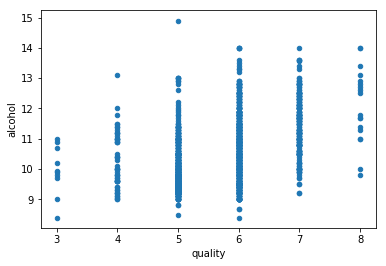

In [239]:
dframe_wine.plot(kind = 'scatter', x ='quality', y ='alcohol')

In [279]:
# split , apply and combine

dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.510204
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.510204
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.612245
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915


In [280]:
def ranker(df):
    df['alc_content_rank'] = np.arange(len(df)) +1
    return df

In [281]:
dframe_wine.sort_values('alcohol', ascending = False, inplace = True)

In [282]:
len(dframe_wine)

1599

In [283]:
dframe_wine = dframe_wine.groupby('quality').apply(ranker)

In [263]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio,alc_content_rank
652,15.9,0.360,0.65,7.50,0.096,22.0,71.0,0.99760,2.98,0.84,14.900000,5,0.335570,1
588,5.0,0.420,0.24,2.00,0.060,19.0,50.0,0.99170,3.72,0.74,14.000000,8,0.571429,1
142,5.2,0.340,0.00,1.80,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6,0.428571,1
144,5.2,0.340,0.00,1.80,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6,0.428571,2
1270,5.0,0.380,0.01,1.60,0.048,26.0,60.0,0.99084,3.70,0.75,14.000000,6,0.428571,3
1269,5.5,0.490,0.03,1.80,0.044,28.0,87.0,0.99080,3.50,0.82,14.000000,8,0.571429,2
467,8.8,0.460,0.45,2.60,0.065,7.0,18.0,0.99470,3.32,0.79,14.000000,6,0.428571,4
821,4.9,0.420,0.00,2.10,0.048,16.0,42.0,0.99154,3.71,0.74,14.000000,7,0.500000,1
1114,5.0,0.400,0.50,4.30,0.046,29.0,80.0,0.99020,3.49,0.66,13.600000,6,0.441176,5
1228,5.1,0.420,0.00,1.80,0.044,18.0,88.0,0.99157,3.68,0.73,13.600000,7,0.514706,2


In [284]:
num_qual = dframe_wine['quality'].value_counts()

In [285]:
num_qual

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [286]:
dframe_wine[dframe_wine['alc_content_rank'] == 1].head(len(num_qual))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,0.335570,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,0.571429,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0.428571,1
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7,0.500000,1
45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,0.305344,1
899,8.3,1.02,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,0.272727,1


In [270]:
dframe_wine['citric acid'] == 0.65

False

In [288]:
# cross tabulation

from io import StringIO


In [289]:
data ="""\
Sample   Animal   Intelligence
1 Dog Smart
2 Dog Smart
3 Cat Dumb
4 Cat Dumb
5 Dog Dumb
6 Cat Smart"""

#Store as dframe
dframe = pd.read_table(StringIO(data),sep='\s+')

In [290]:
dframe

,Sample,Animal,Intelligence
0,1,Dog,Smart
1,2,Dog,Smart
2,3,Cat,Dumb
3,4,Cat,Dumb
4,5,Dog,Dumb
5,6,Cat,Smart


In [291]:
pd.crosstab(dframe.Animal, dframe.Intelligence, margins = True)

Intelligence,Dumb,Smart,All
Animal,,,
Cat,2,1,3
Dog,1,2,3
All,3,3,6
